# **PENERAPAN FP-GROWTH UNTUK MENEMUKAN POLA ASOSIASI ANTAR KATA DALAM REVIEW FILM IMDb**
#### Kelompok 8
#### Firda Zahira Safa - 23031554024
#### Geonisrina Alsyaifi Salsabila - 23031554080
#### Mutiara Restu Aulya - 23031554113

## **Importing Modules**

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.9 MB/s eta 0:00:00


In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 21.3 MB/s eta 0:00:00


In [ ]:
from bs4 import BeautifulSoup
import csv
import time
import os
import pandas as pd
import string
import nltk
import re
import emoji
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Scraping**

In [ ]:
from selenium import webdriver

In [ ]:
url = "https://www.imdb.com/title/tt0271263/reviews/?ref_=tt_ov_urv&sort=submission_date%2Cdesc"

driver = webdriver.Chrome()
driver.get(url)
time.sleep(15)
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

movie_title = soup.find('h2', {'class': 'sc-62b29779-10 hJOQuD'}).get_text(strip=True)

reviews = soup.find_all('div', {'class': 'ipc-html-content-inner-div'})

file_exists = os.path.exists('imdb_reviews.csv')

with open('imdb_reviews.csv', mode='a', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, quoting=csv.QUOTE_MINIMAL)

    if not file_exists:
        writer.writerow(['Title', 'Review'])

    for i, review in enumerate(reviews[:100]):
        movie_review = review.get_text(strip=True)

        movie_review = movie_review.replace('\n', ' ').replace('\r', ' ')

        if movie_review:
            writer.writerow([ movie_title, movie_review])

        print(f"Scraped review {i+1}")

print("Data saved to imdb_reviews.csv")

In [ ]:
df = pd.read_csv('imdb_reviews.csv')
df

,Title,Review
0,10 Things I Hate About You,In my opinion this is one of disney's best mov...
1,10 Things I Hate About You,Light hearted fun in a way that only a 90s tee...
2,10 Things I Hate About You,"I loved this movie,one of my favourite romance..."
3,10 Things I Hate About You,They use every high schooler stereotype and ev...
4,10 Things I Hate About You,A classic of the nineties youth romantic comed...
...,...,...
4975,Zootopia,I've been avoiding a lot of disney movies sinc...
4976,Zootopia,"I love this movie it has a great story, lovely..."
4977,Zootopia,One of my personal favorite animation!! I watc...
4978,Zootopia,"On paper, this movie is exactly what I would e..."


## **Exploratory Data Analysis**

In [ ]:
df.head()

,Title,Review
0,10 Things I Hate About You,In my opinion this is one of disney's best mov...
1,10 Things I Hate About You,Light hearted fun in a way that only a 90s tee...
2,10 Things I Hate About You,"I loved this movie,one of my favourite romance..."
3,10 Things I Hate About You,They use every high schooler stereotype and ev...
4,10 Things I Hate About You,A classic of the nineties youth romantic comed...


### Melihat Struktur Data

In [ ]:
df.shape

(4980, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   4980 non-null   object
 1   Review  4980 non-null   object
dtypes: object(2)
memory usage: 77.9+ KB


### Cek Missing Value

In [ ]:
df.isnull().sum()

,0
Title,0
Review,0


### Distribusi Jumlah Review

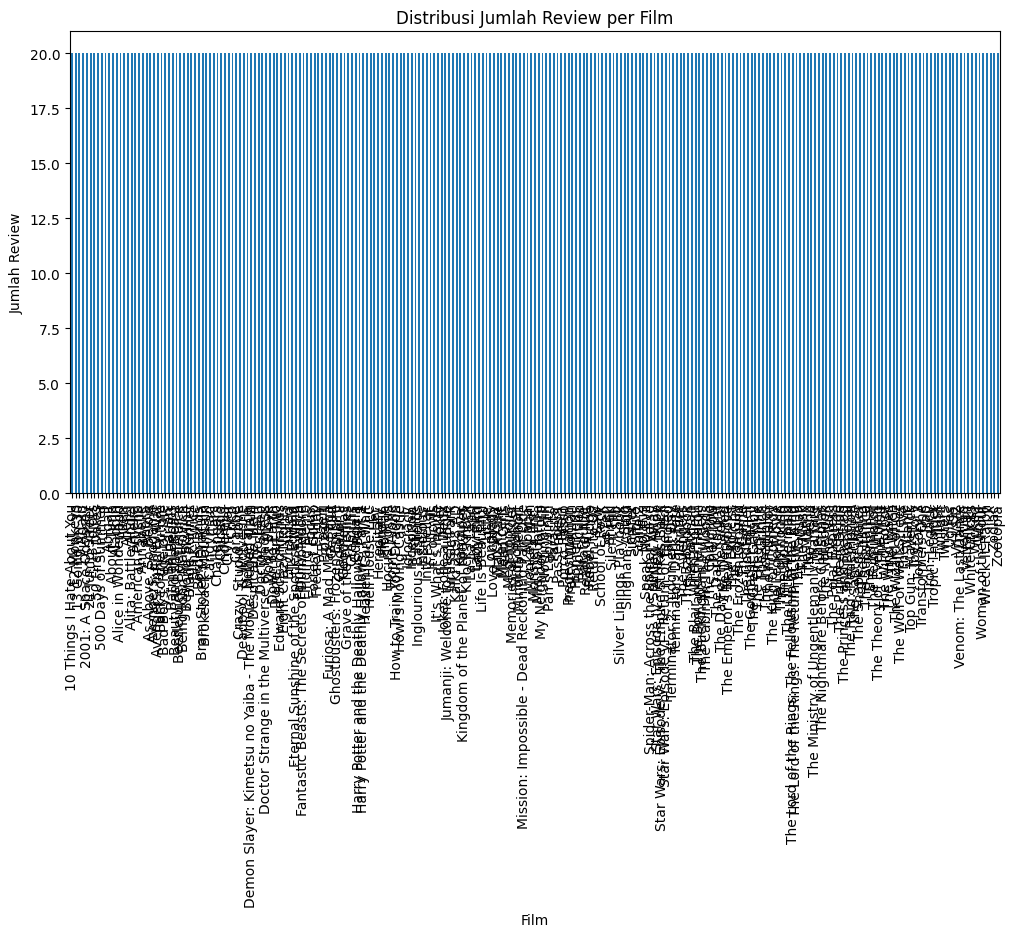

In [ ]:
import matplotlib.pyplot as plt

df["Title"].value_counts().plot(kind="bar", figsize=(12,6))
plt.xlabel("Film")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Jumlah Review per Film")
plt.show()

### Distribusi Panjang Review

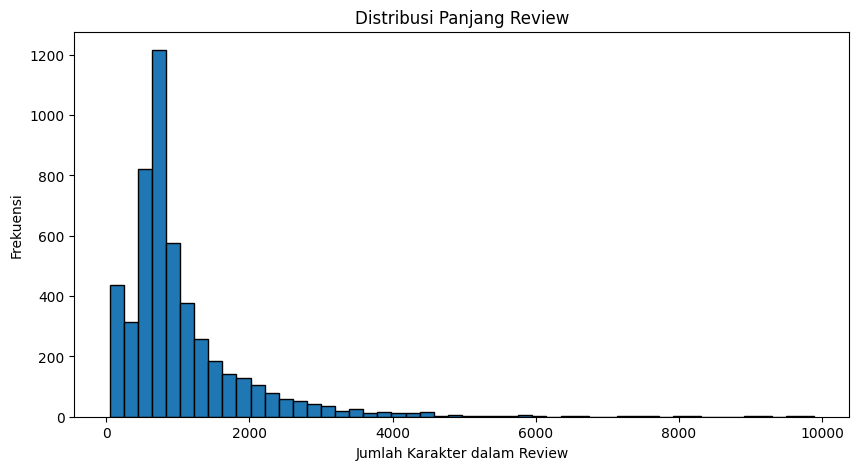

In [ ]:
import matplotlib.pyplot as plt

df["review_length"] = df["Review"].apply(lambda x: len(str(x)))

plt.figure(figsize=(10,5))
plt.hist(df["review_length"], bins=50, edgecolor="black")
plt.xlabel("Jumlah Karakter dalam Review")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Review")
plt.show()

### Melihat Kata-Kata Paling Umum

In [ ]:
from collections import Counter
import re

all_reviews = " ".join(df["Review"].dropna())

words = re.findall(r'\b\w+\b', all_reviews.lower())

word_counts = Counter(words)

print(word_counts.most_common(10))


[('the', 56288), ('and', 30518), ('a', 26380), ('of', 23276), ('to', 20142), ('it', 18278), ('is', 17806), ('i', 14380), ('in', 12703), ('that', 12057)]


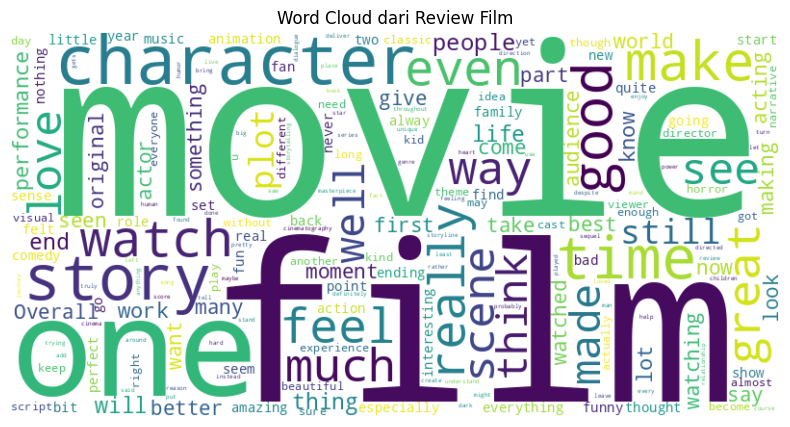

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud dari Review Film")
plt.show()


## **Data Cleaning**

Menghilangkan URL

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df['Review'] = df['Review'].apply(remove_urls)


Memisahkan Emoticons

In [ ]:
def separate_emoticons(text):
    return re.sub(r'(\w)([:;][()DPpOo])', r'\1 \2', text)
df['Review'] = df['Review'].apply(separate_emoticons)

Mengubah Emoji Menjadi Teks

In [ ]:
def convert_emoji_to_text(text):
    text_with_emojis = emoji.demojize(text, language='en')
    text_with_emojis = re.sub(r'(:[^:]+:)', r' \1 ', text_with_emojis)
    return ' '.join(text_with_emojis.split())
df['Review'] = df['Review'].apply(convert_emoji_to_text)

Mengubah Emoticons Menjadi Teks

In [ ]:
emoticon_df = pd.read_csv('emoticons (1).csv')
emoticon_dict = dict(zip(emoticon_df['Emoticon'], emoticon_df['Description']))

def replace_emoticons(text):
    words = text.split()
    replaced_text = " ".join([emoticon_dict.get(word, word) for word in words])
    return replaced_text
df['Review'] = df['Review'].apply(replace_emoticons)

Mengubah Menjadi Huruf Kecil

In [ ]:
df['Review'] = df['Review'].str.lower()

Menghapus Tanda Baca

In [ ]:
def remove_punctuation(text):
    return re.sub(r"[^\w\s]", '', text)

df['Review'] = df['Review'].apply(remove_punctuation)

Menghapus Angka

In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df['Review'] = df['Review'].apply(remove_numbers)

Menghapus Tag HTML

In [ ]:
def remove_html(text):
    url_pattern = re.compile(r'<.*?>')
    return url_pattern.sub(r'', text)
df['Review'] = df['Review'].apply(remove_html)

Mengahapus Stopword

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Review'] = df['Review'].apply(remove_stopwords)

Menghapus 10 Kata Yang Sering Muncul

In [ ]:
cnt = Counter()
for text in df["Review"].values:
    for word in text.split():
        cnt[word] += 1

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
df['Review'] = df['Review'].apply(remove_freqwords)

Menghapus 10 Kata Yang Jarang Muncul

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])
df['Review'] = df['Review'].apply(remove_rarewords)

Mengganti Kata Slang Menjadi Normal

In [ ]:
def replace_slang_from_file(text, file_path):
    slang_dict = {}

    # Load slang dictionary from file
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().lower().split('=')  # Assuming format: slang=normal
            if len(parts) == 2:
                slang, normal = parts
                slang_dict[slang.strip()] = normal.strip()

    # Replace slang words in text
    return " ".join([slang_dict.get(word, word) for word in text.split()])

Mengonversi Tag POS

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # Adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # Verb
    elif treebank_tag.startswith('N'):
        return 'n'  # Noun
    elif treebank_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun

Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text_with_pos(text):
    words = text.split()
    pos_tags = nltk.pos_tag(words)  # Get POS tags
    lemmatized_words = [
        lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos)) for word, pos in pos_tags
    ]
    return " ".join(lemmatized_words)

df['Review'] = df['Review'].apply(lemmatize_text_with_pos)

In [ ]:
df.to_csv('imdb_reviews_cleaned.csv', index=False)

In [ ]:
df

,Title,Review,review_length
0,10 Things I Hate About You,opinion disney best movie funny consistent plo...,138
1,10 Things I Hate About You,light hearted fun way teen highschool comedy a...,302
2,10 Things I Hate About You,love movieone favourite romance timei wish sti...,169
3,10 Things I Hate About You,use every high schooler stereotype every alrea...,170
4,10 Things I Hate About You,classic ninety youth romantic comedy thing hat...,7606
...,...,...,...
4975,Zootopia,ive avoiding lot disney movie since theyre ive...,676
4976,Zootopia,love lovely song use animation zootopia watch,167
4977,Zootopia,personal favorite animation watch theater chil...,304
4978,Zootopia,paper exactly would enjoy execution veryshallo...,1941


## **Tokenisasi - Mengubah Teks Menjadi List Kata**

In [ ]:
df['Tokens'] = df['Review'].apply(lambda x: x.split())
df['Tokens']


,Tokens
0,"[opinion, disney, best, movie, funny, consiste..."
1,"[light, hearted, fun, way, teen, highschool, c..."
2,"[love, movieone, favourite, romance, timei, wi..."
3,"[use, every, high, schooler, stereotype, every..."
4,"[classic, ninety, youth, romantic, comedy, thi..."
...,...
4975,"[ive, avoiding, lot, disney, movie, since, the..."
4976,"[love, lovely, song, use, animation, zootopia,..."
4977,"[personal, favorite, animation, watch, theater..."
4978,"[paper, exactly, would, enjoy, execution, very..."


### Visualisasi Jumlah Kata

<Axes: >

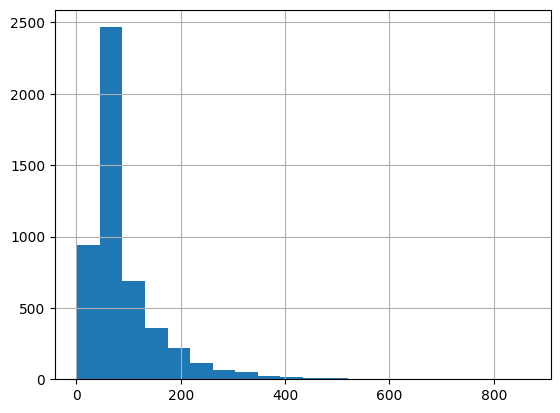

In [ ]:
df['num_words'] = df['Tokens'].apply(len)
df['num_words'].hist(bins=20)


In [ ]:
df

,Title,Review,review_length,Tokens,num_words
0,10 Things I Hate About You,opinion disney best movie funny consistent plo...,138,"[opinion, disney, best, movie, funny, consiste...",12
1,10 Things I Hate About You,light hearted fun way teen highschool comedy a...,302,"[light, hearted, fun, way, teen, highschool, c...",28
2,10 Things I Hate About You,love movieone favourite romance timei wish sti...,169,"[love, movieone, favourite, romance, timei, wi...",14
3,10 Things I Hate About You,use every high schooler stereotype every alrea...,170,"[use, every, high, schooler, stereotype, every...",20
4,10 Things I Hate About You,classic ninety youth romantic comedy thing hat...,7606,"[classic, ninety, youth, romantic, comedy, thi...",641
...,...,...,...,...,...
4975,Zootopia,ive avoiding lot disney movie since theyre ive...,676,"[ive, avoiding, lot, disney, movie, since, the...",54
4976,Zootopia,love lovely song use animation zootopia watch,167,"[love, lovely, song, use, animation, zootopia,...",7
4977,Zootopia,personal favorite animation watch theater chil...,304,"[personal, favorite, animation, watch, theater...",26
4978,Zootopia,paper exactly would enjoy execution veryshallo...,1941,"[paper, exactly, would, enjoy, execution, very...",165


### Menampilkan 15 Kata Paling Sering Muncul

In [ ]:
from collections import Counter
all_words = [word for tokens in df['Tokens'] for word in tokens]
freq = Counter(all_words).most_common(15)
freq

[('make', 3831),
 ('watch', 3296),
 ('see', 2413),
 ('get', 2254),
 ('well', 2164),
 ('love', 1959),
 ('go', 1854),
 ('film', 1852),
 ('also', 1820),
 ('even', 1778),
 ('feel', 1757),
 ('scene', 1684),
 ('think', 1618),
 ('movie', 1617),
 ('end', 1608)]

### Menampilkan Seluruh Kata yang Muncul

In [ ]:
transactions = df['Tokens'].tolist()
transactions

[['opinion',
  'disney',
  'best',
  'movie',
  'funny',
  'consistent',
  'plot',
  'also',
  'bianca',
  'best',
  'character',
  'fight'],
 ['light',
  'hearted',
  'fun',
  'way',
  'teen',
  'highschool',
  'comedy',
  'achieve',
  'unmatched',
  'level',
  'quality',
  'cast',
  'many',
  'young',
  'star',
  'archetypes',
  'stand',
  'mile',
  'away',
  'doesnt',
  'matter',
  'get',
  'basic',
  'do',
  'well',
  'enjoyable',
  'watch',
  'rewatch'],
 ['love',
  'movieone',
  'favourite',
  'romance',
  'timei',
  'wish',
  'still',
  'make',
  'movie',
  'storythe',
  'everything',
  'perfectunderrated',
  'must',
  'watch'],
 ['use',
  'every',
  'high',
  'schooler',
  'stereotype',
  'every',
  'already',
  'do',
  'trope',
  'book',
  'still',
  'manage',
  'make',
  'work',
  'new',
  'idea',
  'do',
  'well',
  'must',
  'watch'],
 ['classic',
  'ninety',
  'youth',
  'romantic',
  'comedy',
  'thing',
  'hate',
  'show',
  'impossible',
  'love',
  'story',
  'place',


## **Identifikasi Frequent Itemsets dan Association Rules**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_tf = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_tf, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)


### Frequent Itemsets

In [ ]:
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
      support            itemsets
0    0.249598              (also)
1    0.230723             (movie)
2    0.226506         (character)
3    0.191968              (plot)
4    0.179518              (best)
..        ...                 ...
417  0.071084  (watch, something)
418  0.078112       (make, actor)
419  0.080120       (make, world)
420  0.092570       (could, make)
421  0.076305      (could, watch)

[422 rows x 2 columns]


### Association Rules

In [ ]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
    antecedents consequents  antecedent support  consequent support   support  \
0        (also)      (make)            0.249598            0.463454  0.140161   
1        (make)      (also)            0.463454            0.249598  0.140161   
2        (also)       (see)            0.249598            0.320482  0.098996   
3         (see)      (also)            0.320482            0.249598  0.098996   
4        (also)      (well)            0.249598            0.291767  0.096787   
..          ...         ...                 ...                 ...       ...   
535     (world)      (make)            0.135542            0.463454  0.080120   
536     (could)      (make)            0.159639            0.463454  0.092570   
537      (make)     (could)            0.463454            0.159639  0.092570   
538     (could)     (watch)            0.159639            0.414257  0.076305   
539     (watch)     (could)            0.414257            0.159639  0.076305   

     co

### Visualiasi Association Rules

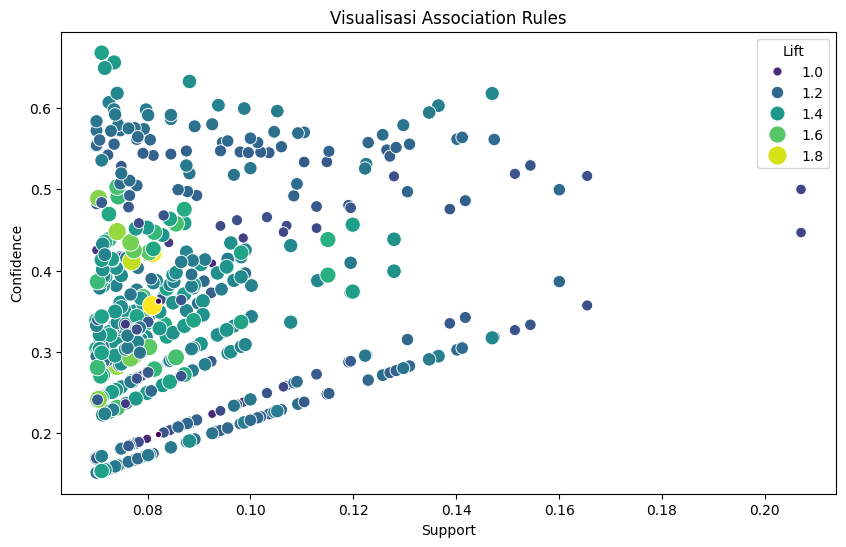

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", sizes=(20, 200), palette="viridis")
plt.title("Visualisasi Association Rules")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift")
plt.show()

## **Analisis Hasil**

```Hasil analisis menunjukkan pola-pola kata yang memiliki hubungan kuat berdasarkan metrik seperti support, confidence, dan lift. Metrik support menunjukkan seberapa sering kombinasi kata muncul bersama dalam seluruh data, confidence menunjukkan seberapa besar kemungkinan satu kata muncul jika kata lain muncul, dan lift mengukur kekuatan hubungan dibandingkan kemunculan acak.```

```Dengan memvisualisasikan aturan menggunakan scatter plot (dengan sumbu support dan confidence, serta ukuran titik berdasarkan lift), kita dapat mengidentifikasi asosiasi kata yang paling signifikan dan bermakna. Misalnya, kata-kata seperti amazing, performance, dan story kemungkinan besar muncul bersamaan dalam review positif, mencerminkan sentimen umum terhadap kualitas film.```

```Secara keseluruhan, penerapan FP-Growth ini memberikan wawasan penting terhadap bagaimana penonton menggambarkan film dalam ulasan mereka, dan pola-pola tersebut dapat dimanfaatkan untuk tujuan analisis sentimen, rekomendasi film, atau pengembangan sistem ulasan otomatis.```